In [3]:
# We will start off by importing our libraries and our document we will be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

np.random.seed(42)
sns.set(style="whitegrid")

df = pd.read_csv('../data/3_clustered_songs_dataset.csv')

In [4]:
# We will be selecting and preprocessing our features once move, encoding non-numeric column, filtering and scaling features
relevant_features = [
    'dating', 'violence', 'world_life', 'night_time', 'shake_the_audience', 
    'family_gospel', 'romantic', 'communication', 'obscene', 'music', 
    'movement_places', 'light_visual_perceptions', 'family_spiritual', 
    'sadness', 'feelings', 'topic'
]

for col in relevant_features:
    if not pd.api.types.is_numeric_dtype(df[col]):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

features = df[relevant_features]
features.fillna(features.mean(), inplace=True)

scaler = StandardScaler().fit(features)
scaled_features = scaler.transform(features)

/var/folders/2r/q9fqj_cn30nfpjvb54gvk2d40000gn/T/ipykernel_25850/4265742758.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)


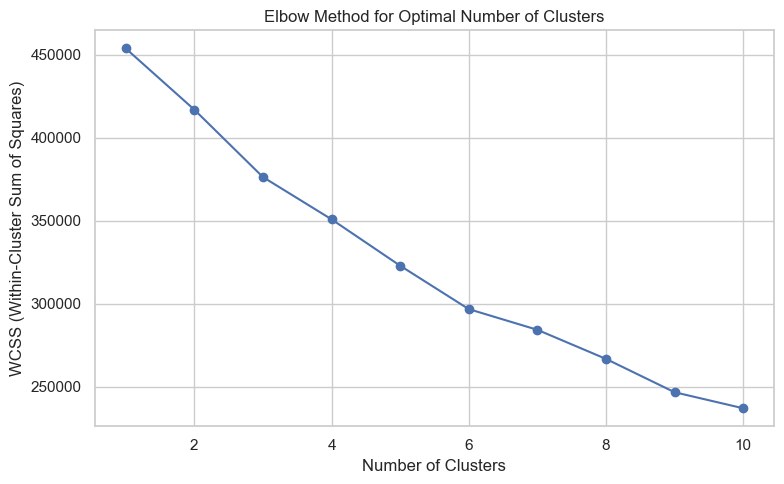

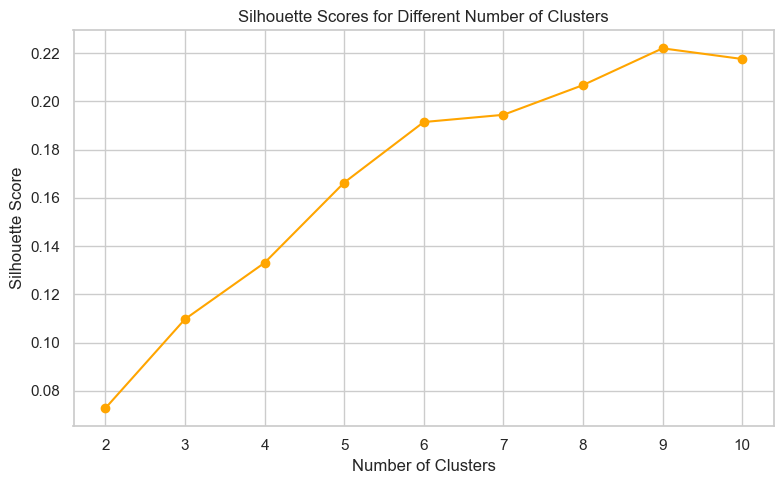

Optimal number of clusters: 9


In [5]:

# We will perform the elbow method for optimal k

# Calculate WCSS (within-cluster sum of squares) and plot the visualization for elbow
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.tight_layout()
plt.savefig(os.path.join('../Images/4.1_elbow_method.png'))
plt.show()

# We will evaluate the silhouette scores for each k from 2 to 10 and plot the scores to identify the optimal k, and determine the optimal 
# number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.savefig(os.path.join('../Images/4.2_silhouette_scores.png'))
plt.show()

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal number of clusters: {optimal_k}")


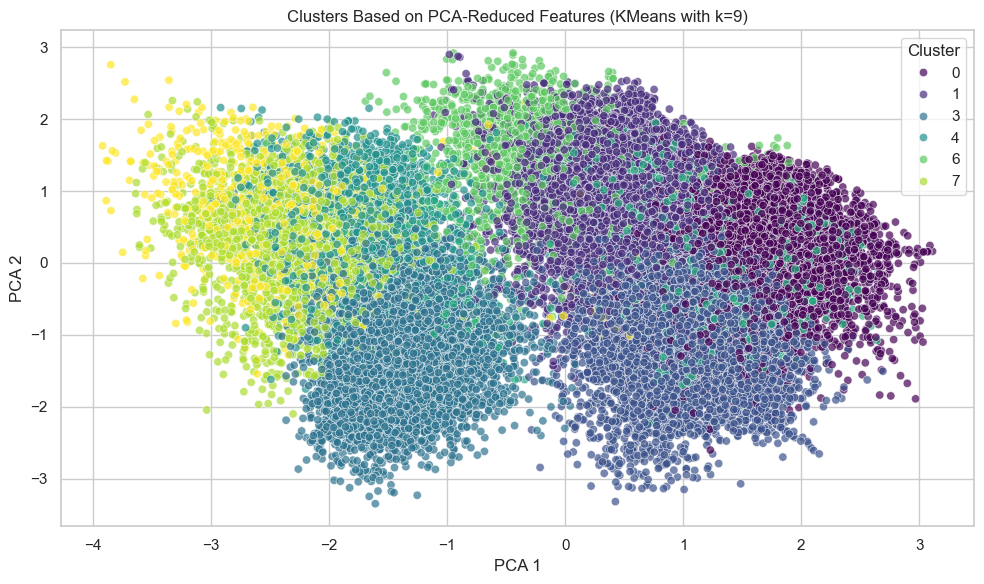

In [6]:

# We will perform kmeans with optimal k, visualize the clusters with PCA and plot it as well and save it at the end
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df['cluster'], palette="viridis", alpha=0.7)
plt.title(f"Clusters Based on PCA-Reduced Features (KMeans with k={optimal_k})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig(os.path.join('../Images/4.3_final_clusters.png'))
plt.show()

df.to_csv('../data/4_clustered_songs_dataset.csv', index=False)
